<a href="https://colab.research.google.com/github/Gitttomo/AntiTextNext/blob/main/Day3_2D%E3%83%9D%E3%83%AF%E3%82%BD%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2次元ポワソン方程式の解法（直接法：ガウスの消去法）
$$
\frac{d^2 T(x,y)}{dx^2} + \frac{d^2 T(x,y)}{dy^2}=q(x,y)
$$
$$0\leq x \leq L_x (=\pi), 0\leq y \leq L_y (=\pi), q(x,y)=\mathrm{sin}(x)\mathrm{sin}(y)$$
境界条件：$$T(x=0,L_x)=0, T(y=0, L_y)=0$$
を解く。
解析解は
$$
T(x,y)=-\frac{1}{2}\mathrm{sin}(x) \mathrm{sin}(y)
$$

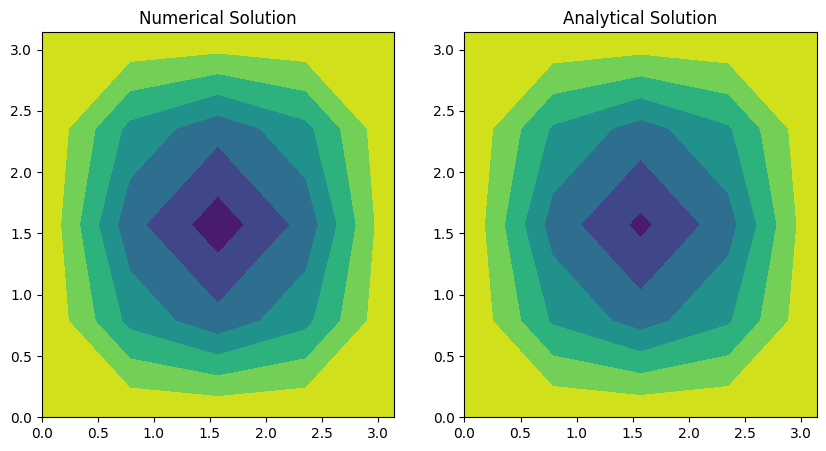

L1ノルムエラー: 6.1815e-03


In [2]:
# prompt: 2次元ポワソン方程式を中心差分法を使って解くコード。発熱量q(x,y)=sin(x)sin(y)で与えられるときの、温度Tの2次元分布を求める。ガウスの消去法を使う。簡略化しない消去法を使う。説明は日本語で書く。T(x,y)をプロットする。解析解もプロットする。numpyを使ってはいけない。描画にだけnumpyを使って良い。
# 数値解と解析解のL1ノルムエラーを計算する。
# AIが提案するままではバグがあったので改変しています

import matplotlib.pyplot as plt #描画用
import numpy as np #for np.meshgrid（描画用）
import math #for pi, sin

# 定数
Lx = math.pi
Ly = math.pi
nx = 5  # x方向の分割数
ny = 5  # y方向の分割数
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)

A0 = -2.0 / (dx * dx) - 2.0 / (dy * dy)
A1 = 1.0 / (dx * dx)
A2 = 1.0 / (dy * dy)

# 発熱量関数
def q(x, y):
    return math.sin(x) * math.sin(y)

# 解析解
def analytical_solution(x, y):
    return -0.5 * math.sin(x) * math.sin(y)

# 行列とベクトルを格納するリストを初期化
A = [[0.0] * (nx * ny) for _ in range(nx * ny)]
b = [0.0] * (nx * ny)

# 行列とベクトルを構築
for i in range(nx):
    for j in range(ny):
#        index = i * ny + j
        index = i + j * ny       # 0 <= index <= NX*NY-1

        if i == 0 or i == nx - 1 or j == 0 or j == ny - 1:
            A[index][index] = 1.0
            b[index] = 0.0
            continue

        x = i * dx
        y = j * dy
        A[index][index] = A0      #T_{i,j}の係数
        A[index][index - ny] = A2 #T_{i,j-1}の係数
        A[index][index + ny] = A2 #T_{i,j+1}の係数
        A[index][index - 1] = A1  #T_{i-1,j}の係数
        A[index][index + 1] = A1  #T_{i+1,j}の係数
        b[index] = q(x, y)

# ガウスの消去法（簡略化しない消去法）
# 前進消去
for k in range(nx * ny):
    for i in range(k + 1, nx * ny):
        factor = A[i][k] / A[k][k]
        for j in range(k, nx * ny):
            A[i][j] -= factor * A[k][j]
        b[i] -= factor * b[k]

# 後退代入
T = [0.0] * (nx * ny)
for i in range(nx * ny - 1, -1, -1):
    sum_val = 0
    for j in range(i + 1, nx * ny):
        sum_val += A[i][j] * T[j]
    T[i] = (b[i] - sum_val) / A[i][i]

# 2Dプロットの描画 ==============================
# 結果を二次元配列に格納
T_2D = [[0.0] * ny for _ in range(nx)]
for i in range(nx):
    for j in range(ny):
        T_2D[i][j] = T[i * ny + j]

# 解析解を計算
analytical_T_2D = [[analytical_solution(i * dx, j * dy) for j in range(ny)] for i in range(nx)]

# プロット
X, Y = np.meshgrid([i * dx for i in range(nx)], [j * dy for j in range(ny)])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].contourf(X, Y, T_2D)
axes[0].set_title("Numerical Solution")
axes[1].contourf(X, Y, analytical_T_2D)
axes[1].set_title('Analytical Solution')
plt.show()

# L1ノルムエラーの計算
l1_error = 0
for i in range(nx):
    for j in range(ny):
        l1_error += abs(T_2D[i][j] - analytical_T_2D[i][j])
l1_error = l1_error / (nx * ny)
print(f"L1ノルムエラー: {l1_error:.4e}")



（nx=ny=4+1と設定した時のL1ノルムエラー）L1-Error(4)=6.1815e-03

L1-Error(8)=

L1-Error(16)=

L1-Error(32)=

L1-Error(64)=